## Problem Statement:
Prediction of Media Cost for food stores in various regions using various features realted to a particular store.

Predicting media costs can be a challenging task as it depends on various factors such as the type of media (e.g., TV, radio, online), the target audience, ad placement, ad format, time of the year, and other market conditions. However, I can provide you with a general framework on how you can approach media cost prediction using various feature selection techniques to optimize the complexity of the model.

In [6]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [7]:
!jt -t chesterish

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = 100

In [ ]:
#importing the dataset
df = pd.read_csv('/content/media prediction and its cost.csv')
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [ ]:
# checking the shape
df.shape

(60428, 40)

In [ ]:
#checking the columns info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [ ]:
#checking for duplicates:
df.duplicated().sum()

0

In [ ]:
#checking for nulls:
df.isnull().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

In [ ]:
#checking for stats:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,0.829351,2.200271,2.115258,13.806433,11.796289,0.558665,0.350434,18.860694,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,1.303424,1.109644,0.932829,4.622693,4.682986,0.496551,0.477110,10.258555,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,0.000000,0.000000,1.000000,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
10%,2.370000,0.913500,2.000000,1.000000,1.000000,0.000000,1.000000,0.800000,7.650000,5.650000,0.000000,0.000000,5.000000,21215.000000,14210.000000,3671.000000,2447.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.270000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,0.000000,0.000000,10.000000,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,1.000000,0.000000,19.000000,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,16.000000,1.000000,1.000000,28.000000,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
90%,11.340000,4.648000,4.000000,5.000000,4.000000,3.000000,4.000000,3.460000,20.300000,18.300000,1.000000,1.000000,33.000000,34791.000000,24390.000000,7041.000000,4694.000000,1.000000,1.000000,1.000000,1.000000,1.000000,140.570000
95%,13.080000,5.344520,4.000000,5.000000,4.000000,4.000000,4.000000,3.750000,21.200000,19.200000,1.000000,1.000000,34.000000,39696.000000,26354.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,145.410000


In [ ]:
# as we can see there are two columns named 'avg_cars_at home(approx)', so let's drop 1:
df.drop(columns='avg_cars_at home(approx).1',inplace=True)

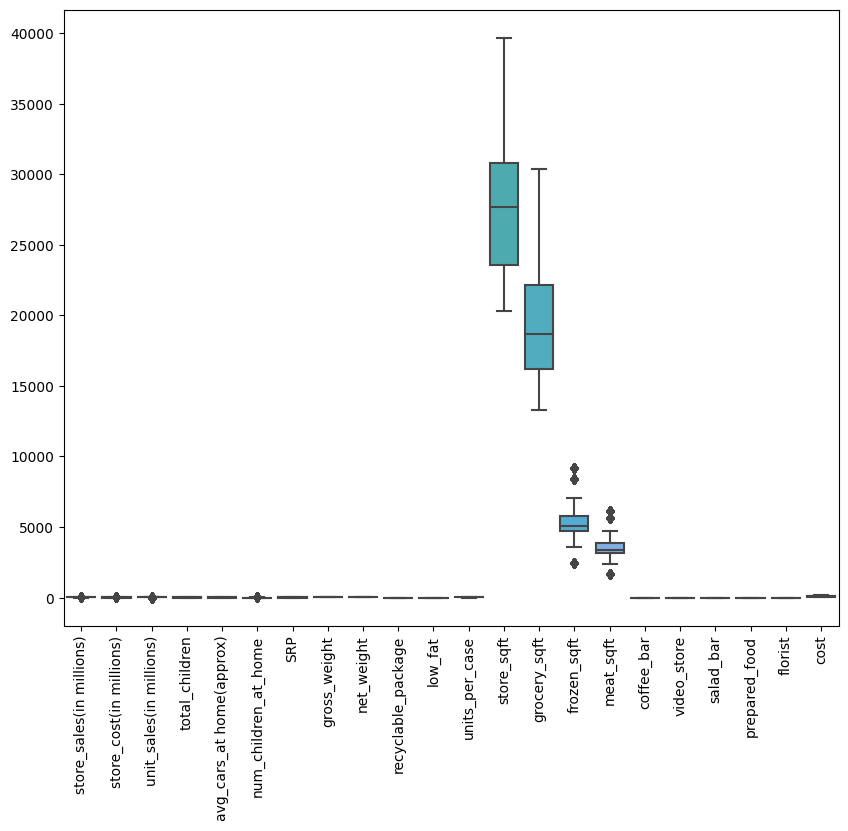

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

## Analysing each column:

In [ ]:
df.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home', 'brand_name', 'SRP',
       'gross_weight', 'net_weight', 'recyclable_package', 'low_fat',
       'units_per_case', 'store_type', 'store_city', 'store_state',
       'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar',
       'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type',
       'cost'],
      dtype='object')

In [ ]:
df['food_category'].unique()

array(['Breakfast Foods', 'Bread', 'Canned Shrimp', 'Baking Goods',
       'Vegetables', 'Frozen Desserts', 'Candy', 'Snack Foods', 'Dairy',
       'Starchy Foods', 'Cleaning Supplies', 'Decongestants', 'Meat',
       'Hot Beverages', 'Jams and Jellies', 'Carbonated Beverages',
       'Seafood', 'Specialty', 'Kitchen Products', 'Electrical',
       'Beer and Wine', 'Candles', 'Fruit', 'Pure Juice Beverages',
       'Canned Soup', 'Paper Products', 'Canned Tuna', 'Eggs', 'Hardware',
       'Canned Sardines', 'Canned Clams', 'Pain Relievers', 'Side Dishes',
       'Bathroom Products', 'Magazines', 'Frozen Entrees', 'Pizza',
       'Cold Remedies', 'Canned Anchovies', 'Drinks', 'Hygiene',
       'Plastic Products', 'Canned Oysters', 'Packaged Vegetables',
       'Miscellaneous'], dtype=object)

Text(0.5, 1.0, 'Top 10 most sold food categories')

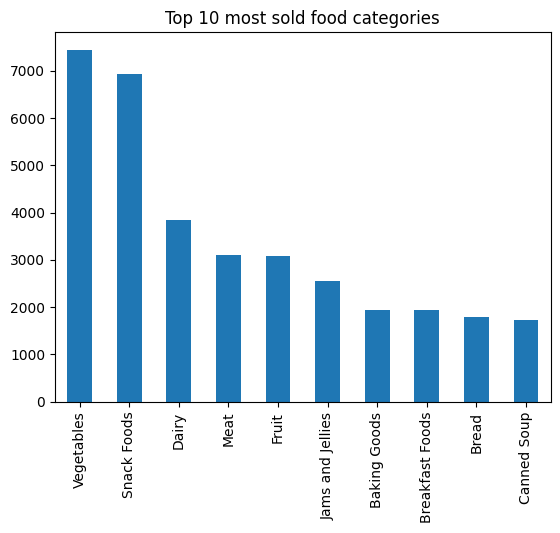

In [ ]:
df['food_category'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 most sold food categories')

In [ ]:
df['food_department'].unique()

array(['Frozen Foods', 'Baked Goods', 'Canned Foods', 'Baking Goods',
       'Produce', 'Snacks', 'Snack Foods', 'Dairy', 'Starchy Foods',
       'Household', 'Health and Hygiene', 'Meat', 'Beverages', 'Seafood',
       'Deli', 'Alcoholic Beverages', 'Canned Products', 'Eggs',
       'Periodicals', 'Breakfast Foods', 'Checkout', 'Carousel'],
      dtype=object)

Text(0.5, 1.0, 'Top 10 food-departments selling most food categories')

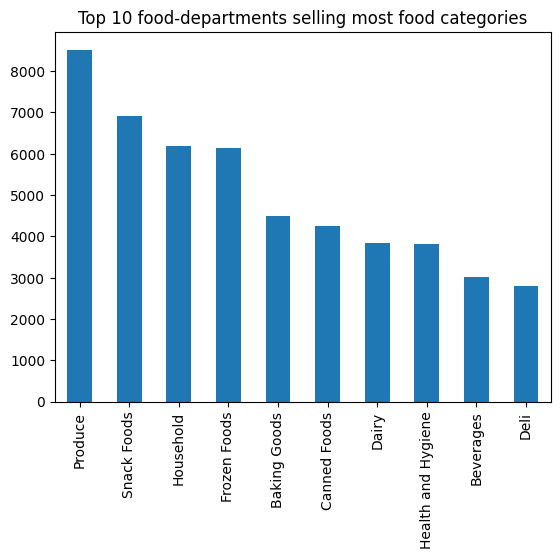

In [ ]:
df['food_department'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 food-departments selling most food categories')

In [ ]:
df['food_family'].unique()

array(['Food', 'Non-Consumable', 'Drink'], dtype=object)

<Axes: xlabel='food_family', ylabel='count'>

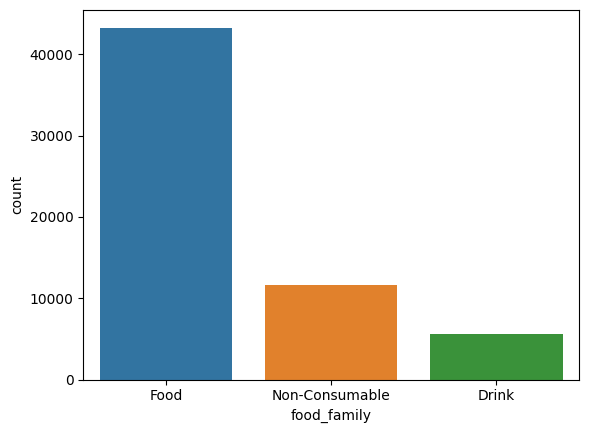

In [ ]:
sns.countplot(x=df['food_family'])

<Axes: xlabel='store_sales(in millions)', ylabel='Count'>

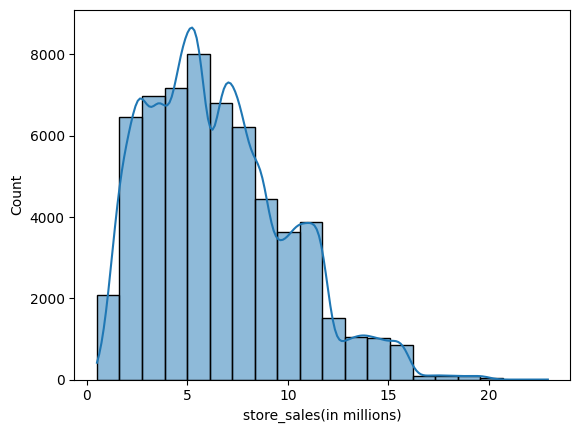

In [ ]:
sns.histplot(df['store_sales(in millions)'],bins=20,kde=True)

<Axes: xlabel='store_cost(in millions)', ylabel='Count'>

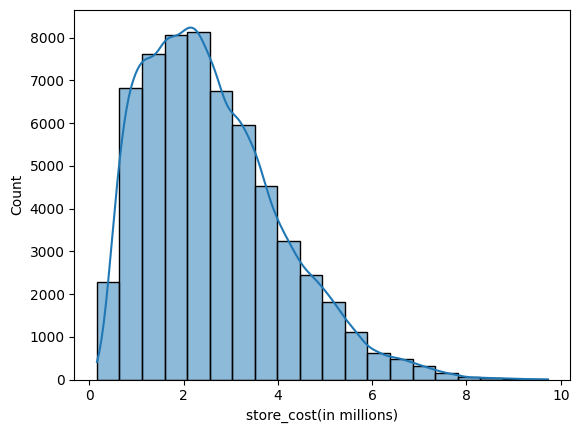

In [ ]:
sns.histplot(df['store_cost(in millions)'],bins=20,kde=True)

<Axes: xlabel='unit_sales(in millions)', ylabel='count'>

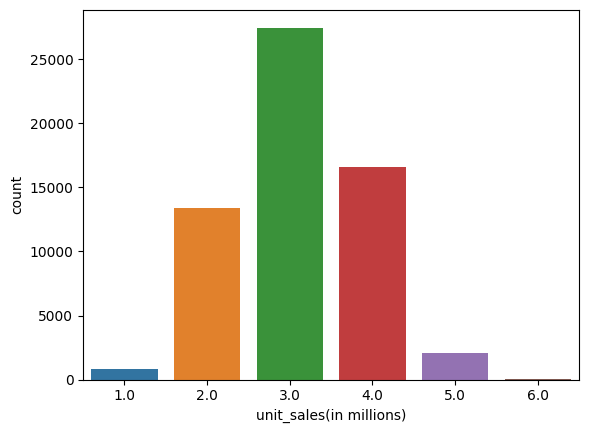

In [ ]:
sns.countplot(x=df['unit_sales(in millions)'])

In [ ]:
df['promotion_name'].unique()

array(['Bag Stuffers', 'Cash Register Lottery', 'High Roller Savings',
       'Double Down Sale', 'Green Light Days', 'Big Time Savings',
       'Price Savers', 'Price Slashers', 'Dollar Days', 'Two Day Sale',
       'Super Duper Savers', 'Weekend Markdown', 'Dollar Cutters',
       'Sales Galore', 'Big Promo', 'Free For All', 'Savings Galore',
       'Unbeatable Price Savers', 'Price Smashers', 'Shelf Clearing Days',
       'Sales Days', 'Go For It', 'Super Savers', 'Wallet Savers',
       'Save-It Sale', 'Price Destroyers', 'Two for One',
       'Big Time Discounts', 'Shelf Emptiers', 'Bye Bye Baby',
       'One Day Sale', 'Fantastic Discounts', 'Saving Days',
       'You Save Days', 'Sale Winners', 'Coupon Spectacular',
       'Three for One', 'Price Winners', 'Dimes Off',
       'I Cant Believe It Sale', 'Money Savers', 'Green Light Special',
       'Price Cutters', 'Tip Top Savings', 'Best Savings',
       'Pick Your Savings', 'Double Your Savings', 'Mystery Sale',
       'Super W

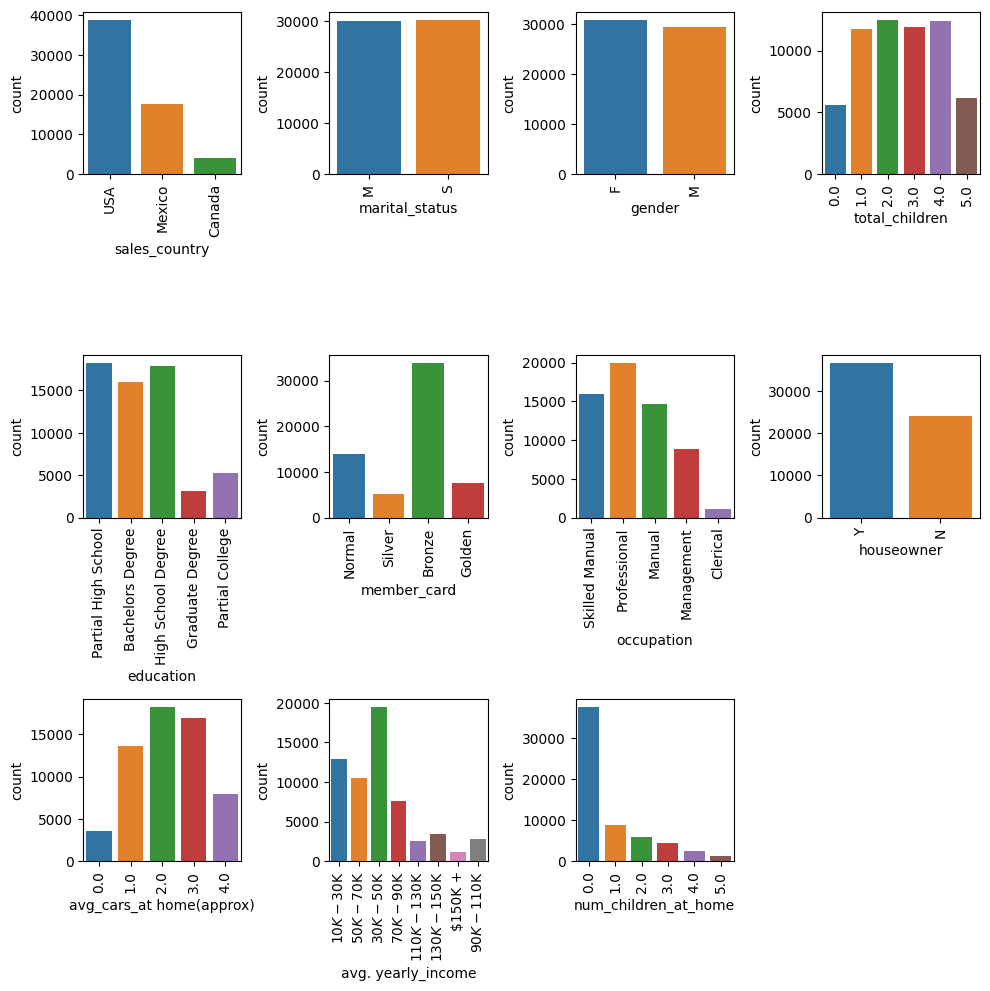

In [ ]:
cols = ['sales_country','marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
      'avg. yearly_income','num_children_at_home',]
plt.figure(figsize=(10,10))      
for i in range(len(cols)):
  plt.subplot(3,4,i+1)
  sns.countplot(x=df[cols].iloc[:,i])
  plt.xticks(rotation=90)  
plt.tight_layout()

In [ ]:
df['brand_name'].unique()

array(['Carrington', 'Golden', 'Imagine', 'Big Time', 'PigTail',
       'Fantastic', 'Great', 'Sphinx', 'Modell', 'Colony', 'Blue Label',
       'Pleasant', 'Bravo', 'Better', 'Just Right', 'Plato', 'BBB Best',
       'Landslide', 'Super', 'CDR', 'High Top', 'Tri-State', 'Hermanos',
       'Tell Tale', 'Ebony', 'Thresher', 'Gulf Coast', 'Musial', 'Atomic',
       'Choice', 'Fort West', 'Nationeel', 'Horatio', 'Best Choice',
       'Fast', 'Gorilla', 'Carlson', 'Even Better', 'Club', 'Booker',
       'Shady Lake', 'Monarch', 'Discover', 'Colossal', 'Medalist',
       'Jardon', 'Cormorant', 'Sunset', 'Red Wing', 'High Quality',
       'Denny', 'Faux Products', 'Steady', 'Consolidated', 'Bird Call',
       'Hilltop', 'Ship Shape', 'Footnote', 'Genteel', 'Quick', 'Gerolli',
       'Excellent', 'Fabulous', 'Token', 'Skinner', 'Washington',
       'Dual City', 'Kiwi', 'Tip Top', 'Amigo', 'Curlew', 'Moms',
       'Cutting Edge', 'Red Spade', 'Lake', 'American', 'Walrus', 'Pearl',
       'Good

<Axes: xlabel='SRP', ylabel='Count'>

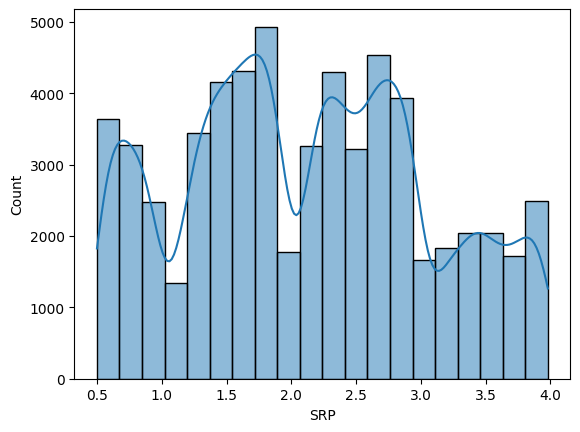

In [ ]:
sns.histplot(df['SRP'],bins=20,kde=True)

<Axes: xlabel='gross_weight', ylabel='Count'>

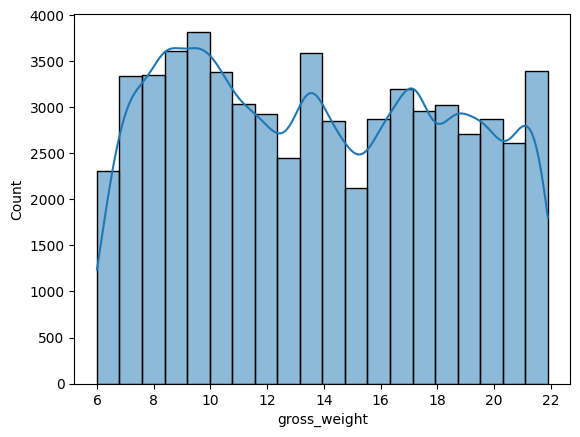

In [ ]:
sns.histplot(df['gross_weight'],bins=20,kde=True)

<Axes: xlabel='net_weight', ylabel='Count'>

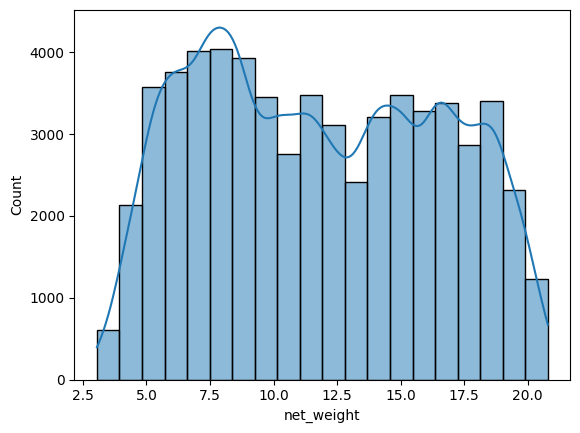

In [ ]:
sns.histplot(df['net_weight'],bins=20,kde=True)

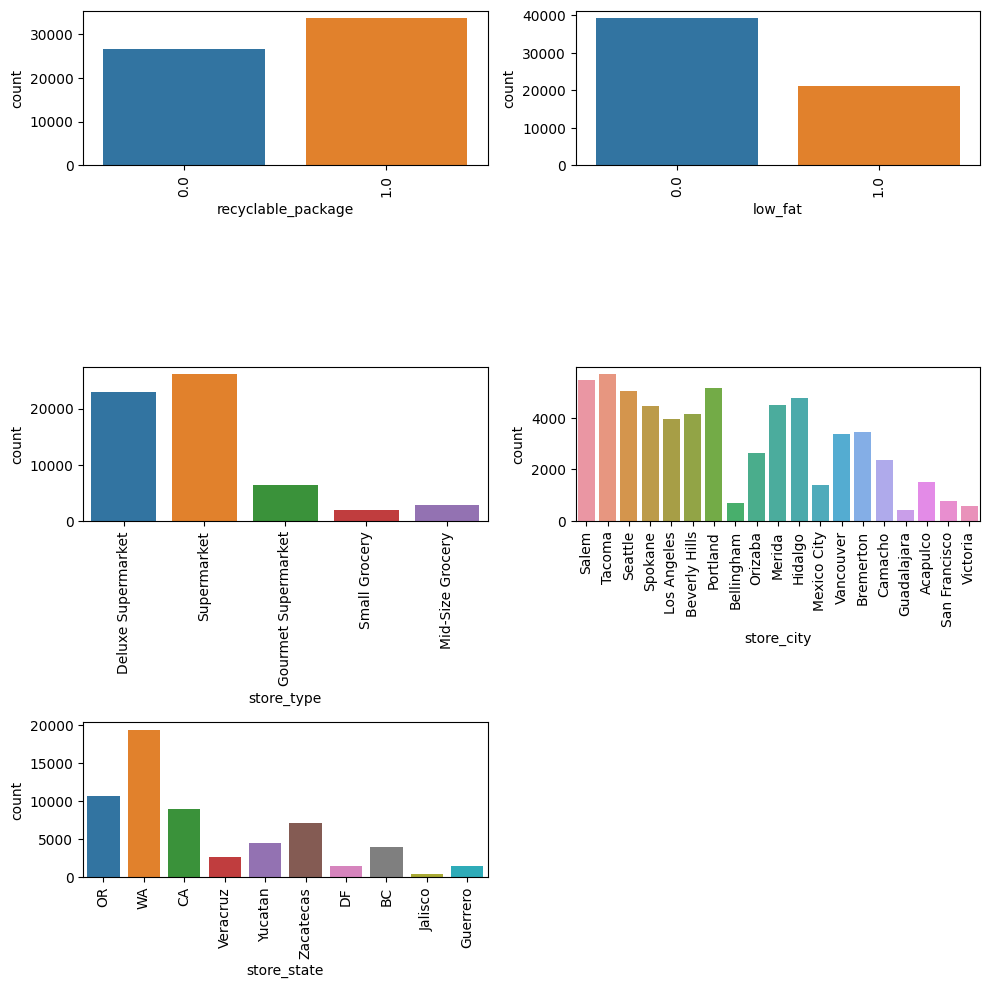

In [ ]:
cols = ['recyclable_package', 'low_fat', 'store_type', 'store_city', 'store_state']
plt.figure(figsize=(10,10))      
for i in range(len(cols)):
  plt.subplot(3,2,i+1)
  sns.countplot(x=df[cols].iloc[:,i])
  plt.xticks(rotation=90)  
plt.tight_layout()

<Axes: xlabel='units_per_case', ylabel='Count'>

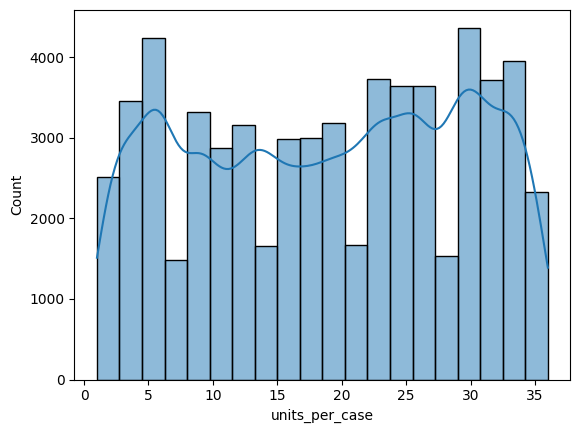

In [ ]:
sns.histplot(df['units_per_case'],bins=20,kde=True)

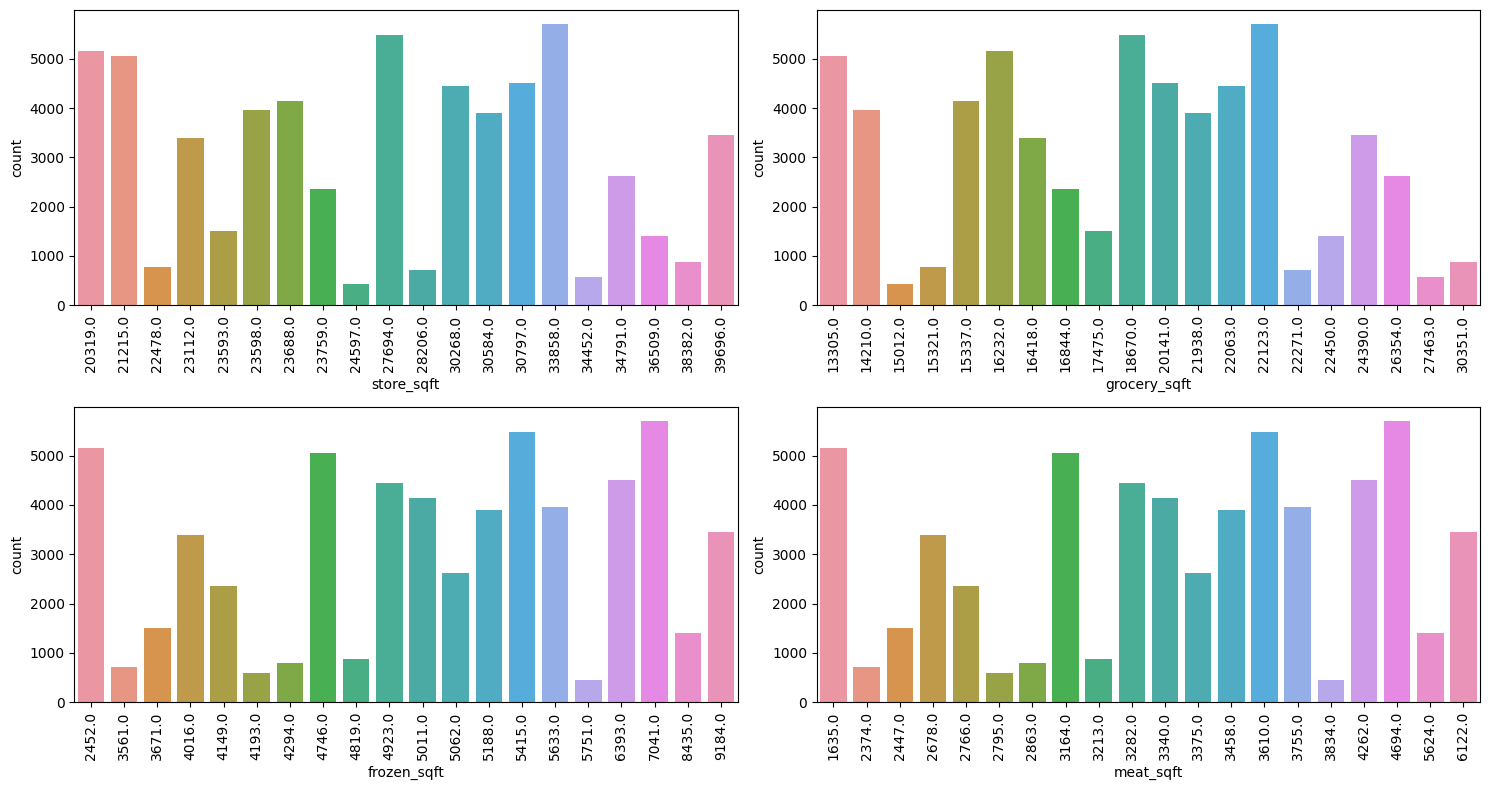

In [ ]:
cols = ['store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft']
plt.figure(figsize=(15,8))      
for i in range(len(cols)):
  plt.subplot(2,2,i+1)
  sns.countplot(x=df[cols].iloc[:,i])
  plt.xticks(rotation=90)  
plt.tight_layout()

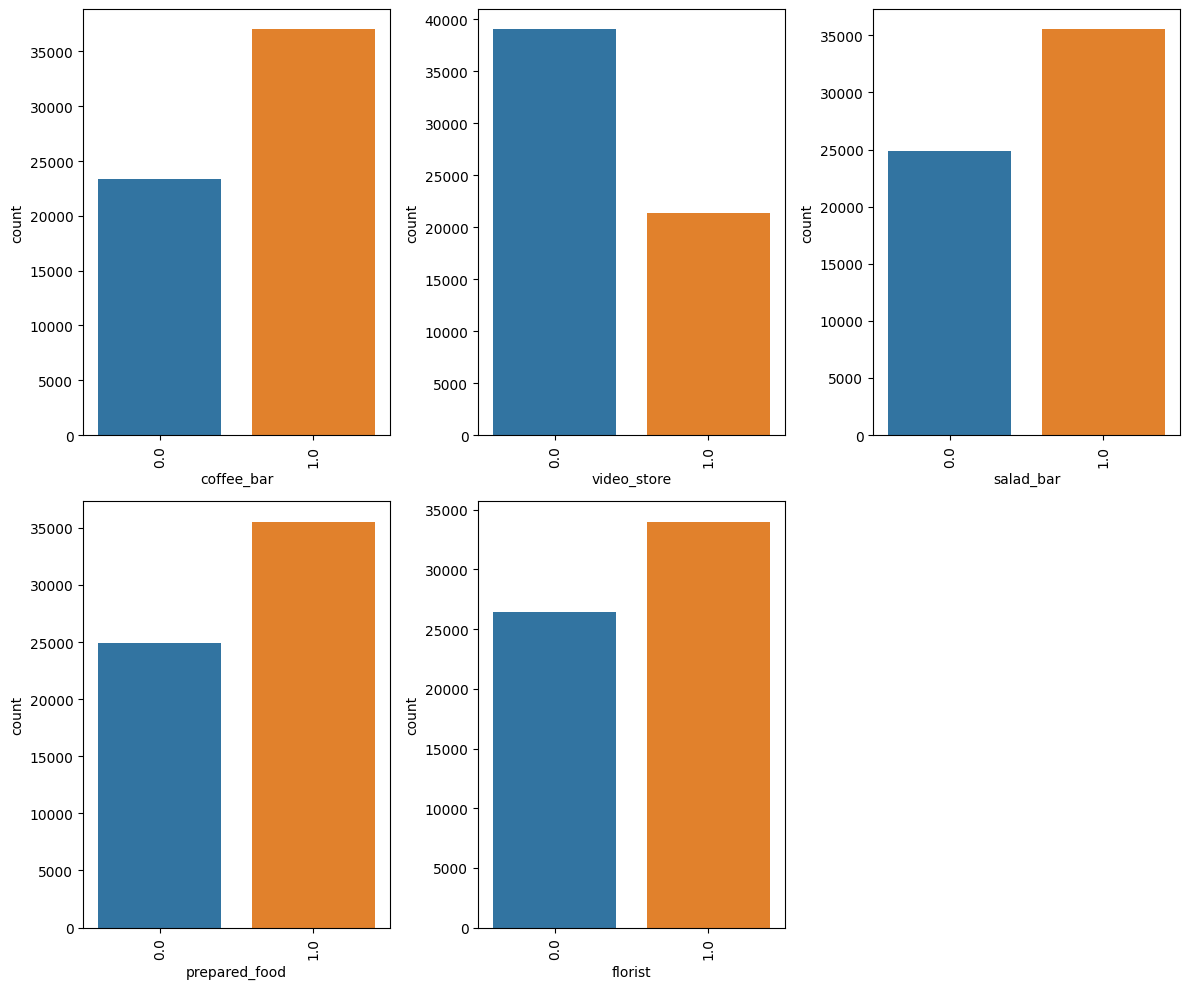

In [ ]:
cols = ['coffee_bar','video_store', 'salad_bar', 'prepared_food', 'florist']
plt.figure(figsize=(12,10))      
for i in range(len(cols)):
  plt.subplot(2,3,i+1)
  sns.countplot(x=df[cols].iloc[:,i])
  plt.xticks(rotation=90)  
plt.tight_layout()

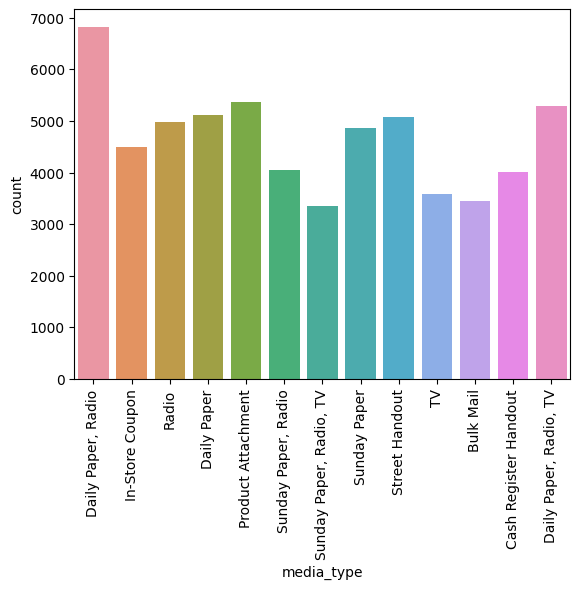

In [ ]:
sns.countplot(x=df['media_type'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='cost', ylabel='Count'>

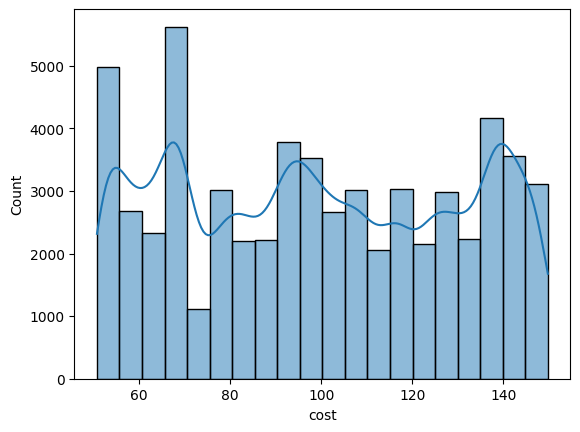

In [ ]:
sns.histplot(df['cost'],bins=20,kde=True)

<Axes: >

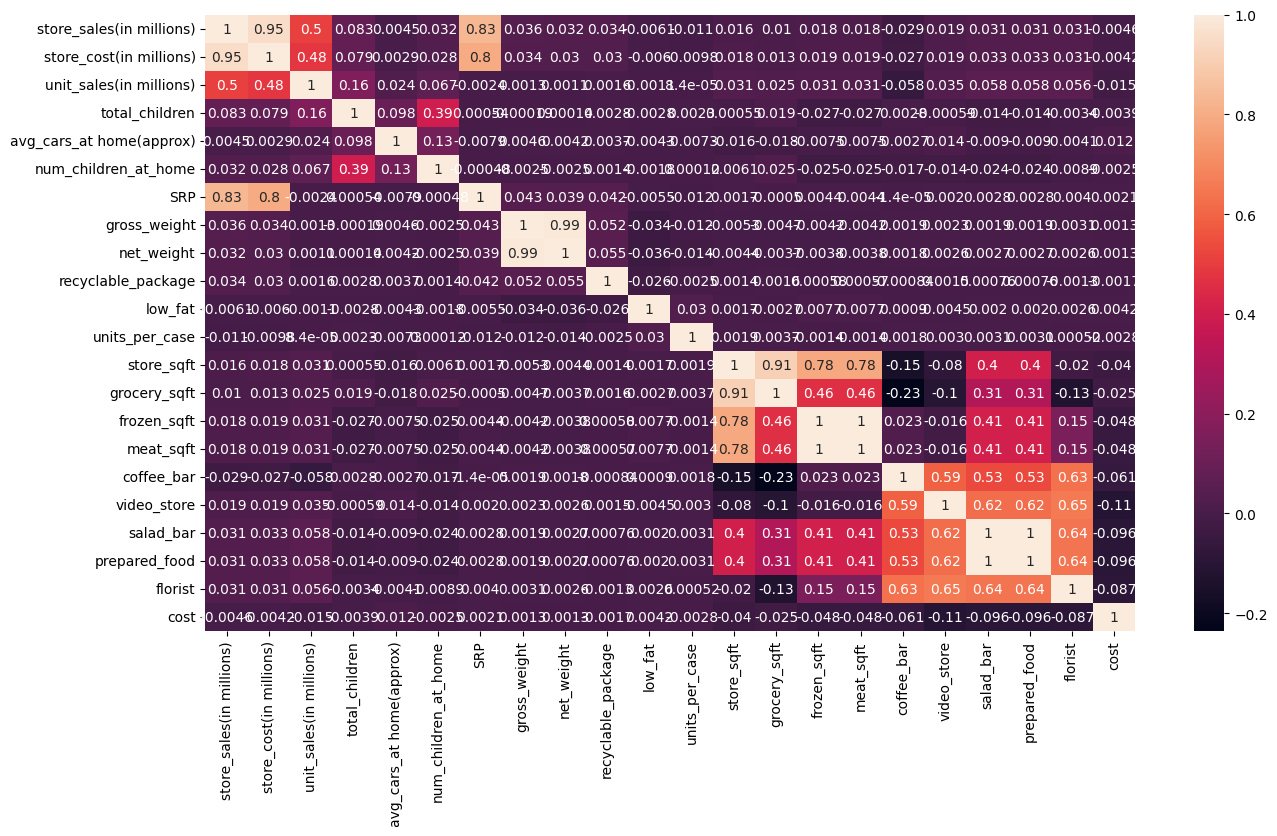

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
X = df.drop(columns='cost')
y = df['cost']

In [ ]:
#train-test-split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type
26932,Fruit,Produce,Food,10.96,3.288,4.0,Go For It,USA,M,M,0.0,Partial High School,Normal,Manual,Y,0.0,$10K - $30K,0.0,Tell Tale,2.74,9.85,7.85,0.0,0.0,10.0,Supermarket,Bremerton,WA,39696.0,24390.0,9184.0,6122.0,0.0,0.0,1.0,1.0,0.0,Radio
48388,Breakfast Foods,Breakfast Foods,Food,10.50,3.570,3.0,Save-It Sale,USA,S,M,2.0,Partial High School,Normal,Manual,Y,1.0,$10K - $30K,0.0,Best,3.50,15.40,12.30,0.0,1.0,19.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio
18378,Snack Foods,Snack Foods,Food,14.24,4.984,4.0,Shelf Emptiers,USA,M,M,0.0,High School Degree,Bronze,Professional,Y,3.0,$90K - $110K,0.0,Fort West,3.56,16.20,14.20,0.0,0.0,19.0,Gourmet Supermarket,Beverly Hills,CA,23688.0,15337.0,5011.0,3340.0,1.0,1.0,1.0,1.0,1.0,Bulk Mail
39684,Snack Foods,Snack Foods,Food,5.28,2.376,4.0,Price Smashers,USA,S,M,5.0,High School Degree,Bronze,Manual,N,1.0,$30K - $50K,0.0,Horatio,1.32,14.20,12.10,0.0,1.0,35.0,Supermarket,Seattle,WA,21215.0,13305.0,4746.0,3164.0,1.0,0.0,0.0,0.0,0.0,Product Attachment
51334,Drinks,Beverages,Drink,3.35,1.474,5.0,Save-It Sale,USA,M,F,4.0,Bachelors Degree,Normal,Professional,Y,2.0,$10K - $30K,3.0,Skinner,0.67,7.11,5.11,0.0,1.0,16.0,Supermarket,Los Angeles,CA,23598.0,14210.0,5633.0,3755.0,0.0,0.0,0.0,0.0,1.0,Daily Paper


In [ ]:
!pip install -q category_encoders
from category_encoders import TargetEncoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.9 MB/s eta 0:00:00


In [ ]:
cat_cols = X_train.select_dtypes(exclude='number').columns.to_list()
cat_cols

['food_category',
 'food_department',
 'food_family',
 'promotion_name',
 'sales_country',
 'marital_status',
 'gender',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'avg. yearly_income',
 'brand_name',
 'store_type',
 'store_city',
 'store_state',
 'media_type']

In [ ]:
X_train_te = X_train
X_test_te = X_test

In [ ]:
te = TargetEncoder()
for i in cat_cols:
  X_train_te[i] = te.fit_transform(X_train[i],y_train)
  X_test_te[i] = te.transform(X_test[i])

In [ ]:
X_train_te

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type
26932,99.143915,98.808449,99.477939,10.96,3.2880,4.0,94.573155,98.438189,99.293032,99.062727,0.0,99.197282,99.237081,98.607539,99.349305,0.0,99.350882,0.0,98.625672,2.74,9.85,7.85,0.0,0.0,10.0,100.773259,98.459942,99.120354,39696.0,24390.0,9184.0,6122.0,0.0,0.0,1.0,1.0,0.0,96.733755
48388,99.772241,100.187445,99.477939,10.50,3.5700,3.0,90.681263,98.438189,99.313820,99.062727,2.0,99.197282,99.237081,98.607539,99.349305,1.0,99.350882,0.0,99.149779,3.50,15.40,12.30,0.0,1.0,19.0,94.606922,84.324038,94.480054,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,96.733755
18378,99.801258,99.801258,99.477939,14.24,4.9840,4.0,128.972719,98.438189,99.293032,99.062727,0.0,99.038742,99.400540,98.898421,99.349305,3.0,99.806705,0.0,99.169897,3.56,16.20,14.20,0.0,0.0,19.0,102.916393,101.045139,101.616119,23688.0,15337.0,5011.0,3340.0,1.0,1.0,1.0,1.0,1.0,104.230793
39684,99.801258,99.801258,99.477939,5.28,2.3760,4.0,111.741868,98.438189,99.313820,99.062727,5.0,99.038742,99.400540,98.607539,99.233312,1.0,99.417661,0.0,99.906810,1.32,14.20,12.10,0.0,1.0,35.0,100.773259,103.377178,99.120354,21215.0,13305.0,4746.0,3164.0,1.0,0.0,0.0,0.0,0.0,104.335314
51334,98.670462,98.891609,98.782695,3.35,1.4740,5.0,90.681263,98.438189,99.293032,99.532302,4.0,99.525089,99.237081,98.898421,99.349305,2.0,99.350882,3.0,98.824325,0.67,7.11,5.11,0.0,1.0,16.0,100.773259,101.680122,101.616119,23598.0,14210.0,5633.0,3755.0,0.0,0.0,0.0,0.0,1.0,89.402977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,98.472741,98.736944,98.903829,6.90,2.7600,2.0,90.755226,98.438189,99.293032,99.062727,0.0,99.197282,99.400540,99.959877,99.349305,4.0,99.806705,0.0,98.202967,3.45,7.86,5.86,1.0,0.0,32.0,94.606922,98.475174,99.120354,33858.0,22123.0,7041.0,4694.0,1.0,0.0,1.0,1.0,1.0,108.353796
38158,98.586455,100.495673,99.477939,5.61,1.7391,3.0,99.776938,98.438189,99.313820,99.532302,2.0,100.076806,99.400540,99.959877,99.349305,4.0,99.417661,0.0,97.885827,1.87,13.20,11.10,1.0,1.0,29.0,94.606922,98.475174,99.120354,33858.0,22123.0,7041.0,4694.0,1.0,0.0,1.0,1.0,1.0,89.402977
860,99.939127,99.939127,99.477939,11.79,4.2444,3.0,73.727431,100.649930,99.313820,99.532302,2.0,99.525089,99.609132,99.959877,99.349305,4.0,100.058817,0.0,101.673797,3.93,15.50,13.50,1.0,1.0,23.0,94.606922,101.677097,100.649930,23112.0,16418.0,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0,101.414052
15795,98.982667,99.192350,99.477939,5.30,1.7490,2.0,95.439695,100.918562,99.313820,99.062727,3.0,99.525089,99.400540,98.898421,99.233312,4.0,100.058817,0.0,99.964462,2.65,11.30,9.30,0.0,0.0,20.0,102.916393,106.263593,105.144781,23759.0,16844.0,4149.0,2766.0,1.0,0.0,1.0,1.0,1.0,104.335314


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_te)
X_test_sc = sc.transform(X_test_te)

In [ ]:
X_train_sc = pd.DataFrame(data=X_train_sc,columns=X_train.columns)
X_test_sc = pd.DataFrame(data=X_test_sc,columns=X_test.columns)

In [ ]:
X_train_sc

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type
0,-0.183599,-0.945566,0.626505,1.275960,0.458879,1.096254,-0.307563,-0.742354,-1.005060,-1.025733,-1.699309,-0.346811,-0.301638,-1.012140,0.808154,-1.979734,0.081449,-0.635379,-0.490324,0.668738,-0.855043,-0.841414,-1.126141,-0.735578,-0.864637,0.340682,-0.124767,-0.038501,2.053891,1.317513,2.459137,2.458870,-1.257924,-0.739891,0.836713,0.836713,-1.134734,-0.332396
1,0.539372,1.688481,0.626505,1.143100,0.652946,-0.111006,-0.560611,-0.742354,0.994965,-1.025733,-0.358183,-0.346811,-0.301638,-1.012140,0.808154,-1.079809,0.081449,-0.635379,-0.111038,1.483712,0.345012,0.108300,-1.126141,1.359474,0.013144,-1.088620,-2.215609,-1.014094,-0.050329,-0.114344,0.065036,0.065099,0.794961,1.351550,0.836713,0.836713,0.881264,-0.332396
2,0.572760,0.950818,0.626505,2.223306,1.626034,1.096254,1.929075,-0.742354,-1.005060,-1.025733,-1.699309,-0.864561,0.440939,-0.589096,0.808154,0.720040,0.864645,-0.635379,-0.096479,1.548052,0.517993,0.513796,-1.126141,-0.735578,0.013144,0.837441,0.257609,0.486218,-0.752671,-0.948677,-0.191588,-0.192193,0.794961,1.351550,0.836713,0.836713,0.881264,0.637353
3,0.572760,0.950818,0.626505,-0.364566,-0.168743,1.096254,0.808736,-0.742354,0.994965,-1.025733,1.653506,-0.864561,0.440939,-1.012140,-1.237387,-1.079809,0.196189,-0.635379,0.436809,-0.853977,0.085541,0.065616,-1.126141,1.359474,1.573644,0.340682,0.602541,-0.038501,-1.186243,-1.457336,-0.359918,-0.359910,0.794961,-0.739891,-1.195154,-1.195154,-1.134734,0.650873
4,-0.728368,-0.786720,-1.870184,-0.921998,-0.789482,2.303513,-0.560611,-0.742354,-1.005060,0.974912,0.982943,0.723722,-0.301638,-0.589096,0.808154,-0.179884,0.081449,1.664316,-0.346562,-1.550994,-1.447503,-1.426182,-1.126141,1.359474,-0.279449,0.340682,0.351529,0.486218,-0.768450,-1.230792,0.203512,0.203275,-1.257924,-0.739891,-1.195154,-1.195154,0.881264,-1.280640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48337,-0.955872,-1.082149,-1.435183,0.103331,0.095519,-1.318266,-0.555802,-0.742354,-1.005060,-1.025733,-1.699309,-0.346811,0.440939,0.954633,0.808154,1.619965,0.864645,-0.635379,-0.796226,1.430095,-1.285333,-1.266118,0.887988,-0.735578,1.281050,-1.088620,-0.122514,-0.038501,1.030359,0.750027,1.097885,1.098080,0.794961,-0.739891,0.836713,0.836713,0.881264,1.170668
48338,-0.825030,2.277232,0.626505,-0.269254,-0.607045,-0.111006,0.030784,-0.742354,0.994965,0.974912,-0.358183,2.525481,0.440939,0.954633,0.808154,1.619965,0.196189,-0.635379,-1.025734,-0.264193,-0.130686,-0.147803,0.887988,1.359474,0.988456,-1.088620,-0.122514,-0.038501,1.030359,0.750027,1.097885,1.098080,0.794961,-0.739891,0.836713,0.836713,0.881264,-1.280640
48339,0.731396,1.214164,0.626505,1.515685,1.117055,-0.111006,-1.662938,1.155156,0.994965,0.974912,-0.358183,0.723722,1.388554,0.954633,0.808154,1.619965,1.297826,-0.635379,1.715541,1.944816,0.366635,0.364403,0.887988,1.359474,0.403269,-1.088620,0.351082,0.283083,-0.853656,-0.678076,-0.823620,-0.823036,0.794961,1.351550,0.836713,0.836713,0.881264,0.273005
48340,-0.369135,-0.212269,0.626505,-0.358789,-0.600232,-1.318266,-0.251221,1.385622,0.994965,-1.025733,0.312380,0.723722,0.440939,-0.589096,-1.237387,1.619965,1.297826,-0.635379,0.478531,0.572228,-0.541515,-0.531957,-1.126141,-0.735578,0.110675,0.837441,1.029470,1.228096,-0.740223,-0.571437,-0.739137,-0.739178,0.794961,-0.739891,0.836713,0.836713,0.881264,0.650873


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
lr = LinearRegression()
lr.fit(X_train_sc,y_train)
y_pred = lr.predict(X_test_sc)
print('r2:',r2_score(y_test,y_pred))
print('rmse:',mean_squared_error(y_test,y_pred,squared=False))


r2: 0.3252619619712529
rmse: 24.690897785317233


In [ ]:
from sklearn.neighbors import KNeighborsRegressor 
knn = KNeighborsRegressor()
knn.fit(X_train_sc,y_train)
y_pred = knn.predict(X_test_sc)
print('r2:',r2_score(y_test,y_pred))
print('rmse:',mean_squared_error(y_test,y_pred,squared=False))


r2: 0.31089221972677183
rmse: 24.952430880343606


In [ ]:
from sklearn.tree import DecisionTreeRegressor 
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print('r2:',r2_score(y_test,y_pred))
print('rmse:',mean_squared_error(y_test,y_pred,squared=False))


r2: 0.9989008631151985
rmse: 0.9965410100822615


# Feature Selection:

## Using Feature Importances from trained Decision Tree:

In [ ]:
# fetching the importance of each feature:
score = dt.feature_importances_
fea_df = pd.DataFrame({'Features':X_train.columns,'Score':score})
fea_df.sort_values(by='Score',ascending=False)

,Features,Score
6,promotion_name,4.607619e-01
37,media_type,2.252296e-01
27,store_state,7.935495e-02
26,store_city,6.496601e-02
30,frozen_sqft,4.554707e-02
29,grocery_sqft,3.687116e-02
31,meat_sqft,3.156821e-02
28,store_sqft,2.565632e-02
25,store_type,1.284558e-02
32,coffee_bar,7.193352e-03


In [ ]:
# taking out cumulative sum to fetch cumulative importance:
fea_df['cum_sum'] = fea_df['Score'].cumsum()
fea_df.sort_values(by='cum_sum',ascending=False)

,Features,Score,cum_sum
37,media_type,2.252296e-01,1.000000
36,florist,6.390794e-04,0.774770
35,prepared_food,5.222453e-03,0.774131
34,salad_bar,9.385652e-04,0.768909
33,video_store,2.353693e-04,0.767970
32,coffee_bar,7.193352e-03,0.767735
31,meat_sqft,3.156821e-02,0.760542
30,frozen_sqft,4.554707e-02,0.728973
29,grocery_sqft,3.687116e-02,0.683426
28,store_sqft,2.565632e-02,0.646555


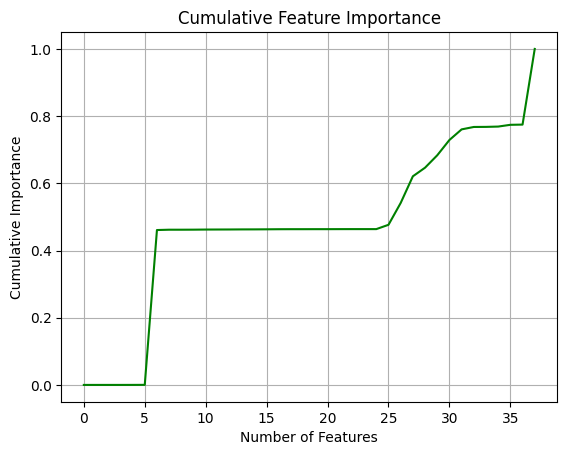

In [ ]:
# Plot the cumulative importances
plt.plot(range(len(score)), fea_df['cum_sum'], 'g-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance')
plt.grid(True)
plt.show()

In [ ]:
#setting a threshold as per the graph:
threshold = 0.45
sel_features = fea_df[fea_df['cum_sum'] > threshold]['Features'].values
sel_features

array(['promotion_name', 'sales_country', 'marital_status', 'gender',
       'total_children', 'education', 'member_card', 'occupation',
       'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income',
       'num_children_at_home', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft',
       'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar',
       'video_store', 'salad_bar', 'prepared_food', 'florist',
       'media_type'], dtype=object)

In [ ]:
# training a new DT on selected features:
X_train_fe = X_train[sel_features]
X_test_fe = X_test[sel_features]

dt = DecisionTreeRegressor()
dt.fit(X_train_fe,y_train)
y_pred = dt.predict(X_test_fe)
print('r2:',r2_score(y_test,y_pred))
print('rmse:',mean_squared_error(y_test,y_pred,squared=False))

r2: 0.9987860321563066
rmse: 1.0473042745962715


## Selecting the features using VIF:

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df['Features'] = X_train.columns
vif_df['Values'] = [variance_inflation_factor(X_train_sc,i) for i in range(len(X_train.columns))]


In [ ]:
vif_df.sort_values(by='Values',ascending=False)

,Features,Values
35,prepared_food,inf
34,salad_bar,inf
28,store_sqft,5.210297e+08
29,grocery_sqft,2.555861e+08
30,frozen_sqft,6.352185e+07
31,meat_sqft,2.100114e+07
20,gross_weight,4.546834e+01
21,net_weight,4.545296e+01
3,store_sales(in millions),3.038674e+01
19,SRP,1.490113e+01


In [ ]:
#setting a threshold:
threshold = 8
sel_features = vif_df[vif_df['Values'] <= threshold]['Features'].values
sel_features

array(['food_category', 'food_department', 'food_family',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner',
       'avg_cars_at home(approx)', 'avg. yearly_income',
       'num_children_at_home', 'brand_name', 'recyclable_package',
       'low_fat', 'units_per_case', 'store_type', 'store_city',
       'store_state', 'coffee_bar', 'video_store', 'florist',
       'media_type'], dtype=object)

In [ ]:
X_train_fe = X_train[sel_features]
X_test_fe = X_test[sel_features]

dt = DecisionTreeRegressor()
dt.fit(X_train_fe,y_train)
y_pred = dt.predict(X_test_fe)
print('r2:',r2_score(y_test,y_pred))
print('rmse:',mean_squared_error(y_test,y_pred,squared=False))

r2: 0.9995713121295876
rmse: 0.6223574351588228


## Using Forward Selection/ Backward Elimination

In [ ]:
!pip install -q --upgrade mlxtend
!pip install -q --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 39.5 MB/s eta 0:00:00


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
model = DecisionTreeRegressor()
sfs = SequentialFeatureSelector(estimator=model,k_features='best',forward=True,floating=False,scoring='r2',cv=5)
sfs.fit(X_train_sc,y_train)

SequentialFeatureSelector(estimator=DecisionTreeRegressor(), k_features=(1, 38),
                          scoring='r2')

In [ ]:
sfs.k_score_

0.9997553722878753

In [ ]:
sel_features = list(sfs.k_feature_names_)
sel_features

['food_family',
 'promotion_name',
 'total_children',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'avg_cars_at home(approx)',
 'avg. yearly_income',
 'num_children_at_home',
 'store_sqft',
 'video_store',
 'media_type']

## Using RFECV

In [ ]:
from sklearn.feature_selection import RFECV
rf = RFECV(model,cv=5,scoring='r2')
rf = rf.fit(X_train,y_train)

In [ ]:
# fetching the selected features:
sel_features = rf.get_feature_names_out()
sel_features

array(['unit_sales(in millions)', 'promotion_name', 'sales_country',
       'gender', 'total_children', 'education', 'occupation',
       'avg_cars_at home(approx)', 'avg. yearly_income',
       'num_children_at_home', 'SRP', 'net_weight', 'store_type',
       'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'salad_bar',
       'media_type'], dtype=object)

In [ ]:
#predicting using the selected features:
y_pred = rf.predict(X_test)
print('r2:',r2_score(y_test,y_pred))
print('rmse:',mean_squared_error(y_test,y_pred,squared=False))

r2: 0.9990089095729597
rmse: 0.9462936487689645
